In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

## Next Step

Kfold

Tag

Count_Descriptionする

BERT特徴量


## Learning trend for the model

Benchmark: 
    
    310.88949952769605 (val) 360.22544 (test)

Add Word count for description and Loan use:
    
    302.439362173603 (val) 351.02701 (test)


In [71]:
train = pd.read_csv('after_processing.csv')
y = pd.read_csv('y.csv')
test = pd.read_csv('test.csv')

In [72]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state = 42)

In [73]:
params = {
    "application" : "regression_l1",
    "metric" : "l1" #mae
}

In [74]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train) 

In [75]:
%%time
evaluation_results = {}
model = lgb.train(params,
                  train_set=lgb_train,
                  valid_sets=lgb_eval,
                  valid_names=["train"],  
                  evals_result=evaluation_results
                  )

[1]	train's l1: 464.693
[2]	train's l1: 448.253
[3]	train's l1: 432.672
[4]	train's l1: 419.281
[5]	train's l1: 407.843
[6]	train's l1: 398.175
[7]	train's l1: 390.578
[8]	train's l1: 383.241
[9]	train's l1: 375.654
[10]	train's l1: 368.084
[11]	train's l1: 362.522
[12]	train's l1: 358.157
[13]	train's l1: 353.516
[14]	train's l1: 350.045
[15]	train's l1: 347.436
[16]	train's l1: 343.814
[17]	train's l1: 341.166
[18]	train's l1: 339.326
[19]	train's l1: 337.645
[20]	train's l1: 336.318
[21]	train's l1: 335.162
[22]	train's l1: 334.217
[23]	train's l1: 333.467
[24]	train's l1: 331.394
[25]	train's l1: 330.05
[26]	train's l1: 328.621
[27]	train's l1: 327.515
[28]	train's l1: 325.639
[29]	train's l1: 324.076
[30]	train's l1: 322.88
[31]	train's l1: 321.861
[32]	train's l1: 321.047
[33]	train's l1: 320.346
[34]	train's l1: 319.457
[35]	train's l1: 318.89
[36]	train's l1: 318.518
[37]	train's l1: 317.965
[38]	train's l1: 317.109
[39]	train's l1: 316.496
[40]	train's l1: 315.772
[41]	train's

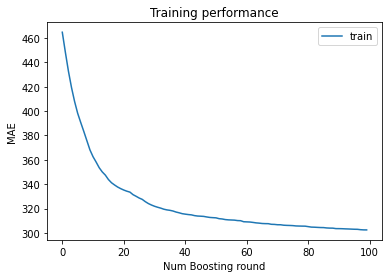

In [76]:
plt.plot(evaluation_results["train"]["l1"], label="train")
plt.ylabel("MAE")
plt.xlabel("Num Boosting round")
plt.title("Training performance")
plt.legend()
plt.show()

In [77]:
y_pred = model.predict(X_test)

In [78]:
MAE = mean_absolute_error(y_test, y_pred)
print("MAE = " + str(MAE))

MAE = 302.439362173603


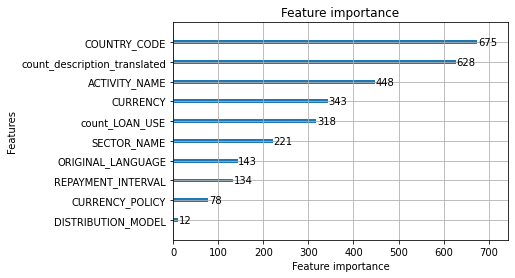

In [79]:
lgb.plot_importance(model)
plt.show()

In [80]:
train_columns = ["ORIGINAL_LANGUAGE", "ACTIVITY_NAME", "SECTOR_NAME", "COUNTRY_CODE","CURRENCY_POLICY",
       "CURRENCY","REPAYMENT_INTERVAL", "DISTRIBUTION_MODEL"]


In [81]:
test_X = test[train_columns]

for column in test_X.columns:
    le = LabelEncoder()
    target_column = test_X[column]
    le.fit(target_column)
    label_encoded_column = le.transform(target_column)
    test_X[column] = pd.Series(label_encoded_column).astype("int")



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
# Count the number of the translated description
test['count_description_translated'] = test['DESCRIPTION_TRANSLATED'].apply(lambda x: x.split()) 
test['count_description_translated'] = test['count_description_translated'].apply(lambda x: len(x)) 
test['count_LOAN_USE'] = test['LOAN_USE'].apply(lambda x: x.split()) 
test['count_LOAN_USE'] = test['count_LOAN_USE'].apply(lambda x: len(x)) 
test.head()

,LOAN_ID,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,IMAGE_ID,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_CODE,COUNTRY_NAME,TOWN_NAME,CURRENCY_POLICY,CURRENCY_EXCHANGE_COVERAGE_RATE,CURRENCY,TAGS,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL,count_description_translated,count_LOAN_USE
0,2041445,English,Marcela is 69 years old and married with ten c...,Marcela is 69 years old and married with ten c...,4051101,General Store,Retail,to buy items to sell like canned goods and per...,PH,Philippines,"Cauayan, Negros Occidental",standard,NaN,PHP,NaN,monthly,field_partner,77,12
1,1944435,English,Roselia is 48 years old and has five children....,Roselia is 48 years old and has five children....,3410523,Pigs,Agriculture,to buy feeds and other supplies to raise her pig,PH,Philippines,"Guihulngan, Negros Oriental",standard,NaN,PHP,"#Animals, #Repeat Borrower, #Schooling, #Woman...",monthly,field_partner,92,10
2,2083354,English,"Ma. Marebil is a single woman, 40 years old wi...","Ma. Marebil is a single woman, 40 years old wi...",4146690,Clothing Sales,Clothing,to buy additional stock of clothes and dresses...,PH,Philippines,"Santa Barbara, Iloilo",standard,NaN,PHP,"#Parent, #Single Parent, #Woman-Owned Business",monthly,field_partner,64,10
3,1993565,English,"Good day, lenders! Meet one of KBMI’s clients,...","Good day, lenders! Meet one of KBMI’s clients,...",3945982,Food,Food,to buy more foods to grow her business.,ID,Indonesia,Pandeglang,shared,0.1,IDR,"#Woman-Owned Business, #Schooling, #Elderly, #...",monthly,field_partner,153,8
4,2064272,English,Rosemarie is a married woman with two children...,Rosemarie is a married woman with two children...,4114040,Food,Food,to buy ingredients for her food production bus...,PH,Philippines,Sogod Cebu,standard,NaN,PHP,NaN,monthly,field_partner,80,8


In [83]:
numerical = test[['count_description_translated', 'count_LOAN_USE']]
test = pd.concat([test_X, numerical], axis=1)

In [84]:
test_predicted = model.predict(test)

In [89]:
submit_df = pd.read_csv('sample_submission.csv')

In [90]:
test_predicted = (np.round(test_predicted/25)*25).astype(int)
submit_df["LOAN_AMOUNT"]=test_predicted
print(submit_df)

       LOAN_ID  LOAN_AMOUNT
0      2041445          400
1      1944435          350
2      2083354          400
3      1993565          500
4      2064272          400
...        ...          ...
91817  1993862          275
91818  2015070          100
91819  1950349          300
91820  1921580         1425
91821  1976733          350

[91822 rows x 2 columns]


In [93]:
submit_df.to_csv('submission.csv',index=False)